<a href="https://colab.research.google.com/github/vijaykumar-ai/git/blob/main/Copy_of_Vehicle_Routing_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
#SOLUTION
!pip install matplotlib deap

# Required Libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [50]:
# TODO: Task 2 - Define the number of locations and vehicles

num_locations = 20 # Define the number of locations (eg 10)

locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]
            # Create a list of tuples representing location coordinates -
            # try to use a random number generator
            # (x, y) could be between 0 and 100

depot = (50,50) # Define the coordinates for the depot

num_vehicles = 3 # Define the number of vehicles - (eg 3)


In [51]:
#SOLUTION - TASK 3 and 4

# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals


In [52]:
#SOLUTION CODE


#Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)

In [53]:
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

In [54]:
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()


gen	nevals	avg    	min    
0  	300   	616.771	4.21771
1  	213   	596.863	1.67715
2  	243   	589.639	1.67715
3  	232   	580.213	1.03374
4  	233   	572.673	3.7028 
5  	218   	566.929	3.39833
6  	213   	560.563	2.59799
7  	233   	554.988	4.58346
8  	219   	553.078	4.10251
9  	209   	540.128	4.9502 
10 	224   	535.841	3.49718
11 	230   	533.838	6.70831
12 	230   	523.173	2.54458
13 	217   	501.878	4.3941 
14 	231   	493.874	6.46787
15 	250   	474.631	3.34419
16 	238   	455.335	2.74793
17 	236   	443.862	1.88814
18 	225   	435.279	7.03221
19 	225   	424.666	5.0122 
20 	209   	415.195	11.5033
21 	232   	409.896	4.84934
22 	237   	404.814	14.5217
23 	217   	404.827	7.04721
24 	227   	399.859	13.0876
25 	246   	395.327	23.1486
26 	233   	386.927	23.9331
27 	219   	380.977	15.92  
28 	229   	376.961	13.0301
29 	223   	368.663	3.02226
30 	238   	363.137	14.1085
31 	225   	356.385	21.7805
32 	221   	356.304	4.14977
33 	243   	347.99 	5.23442
34 	232   	346.392	12.3873
35 	244   	345.832	5.23442
3

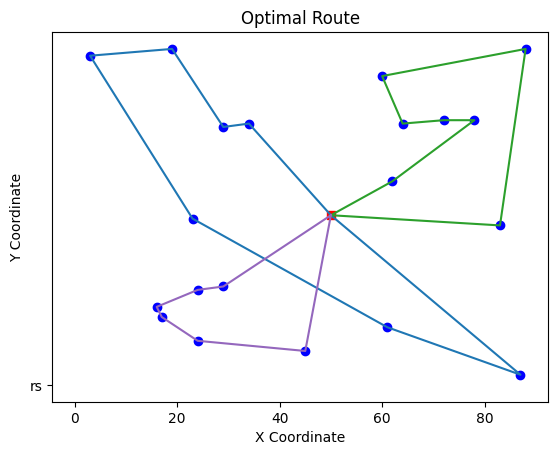

In [55]:
# Running the Genetic Algorithm
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
  main()